In [35]:

from Playground import DataPrep

modules = DataPrep.getModules()
topics = DataPrep.getModuleTopics()

In [36]:
modules

,INDEX,ID,NAME,UNI,DEPT,DEPT_ID,LEVEL,LANG,ECTS,PREREQ,...,DESC_LANG,ENGLISH_DESCRIPTION,MEAN_SCORE,MEDIAN_SCORE,PARENT_DEPT,DIGITAL_SCORE,LEVEL_CLEANED,LANG_CLEANED,MEAN_TOPIC_SCORE,MEDIAN_TOPIC_SCORE
0,65067,BGU51044,Entwerfen und Konstruieren 2,TUM,Engineering and Design,TUBVHBB,Bachelor,German,5,Entwerfen und Konstruieren 1 (BGU51043),...,DE,The aim of the construction design training is...,0.313932,0.116660,Mathematisch-Naturwissenschaftliche und Techni...,1,Bachelor,German,0.309574,0.116660
1,61253,BV090001,Massivbau,TUM,Engineering and Design,TUBVMBA,Master,German,12,aus dem Bachelorbereich:\n- Modul BV000018: Ma...,...,DE,"After taking part in the module ""Massive Build...",0.083009,0.051335,Mathematisch-Naturwissenschaftliche und Techni...,0,Master,German,0.083039,0.051592
2,14263,INF-0351,Biosignalverarbeitung Biosignal Processing,AUG,Fakultät für Angewandte Informatik,,Bachelor,German,6,,...,DE,Contents: Biosignals are usually electrical si...,0.351231,0.301382,Mathematisch-Naturwissenschaftliche und Techni...,2,Bachelor,German,0.348502,0.300695
3,14126,MED-0002,Grundlagen der Medizin II Foundations of Medic...,AUG,Fakultät für Angewandte Informatik,,Bachelor,German,8,,...,DE,"Contents: In the module section, basics of ana...",0.099186,0.038220,Mathematisch-Naturwissenschaftliche und Techni...,0,Bachelor,German,0.097952,0.038220
4,15091,INF-0206,Physical Computing Physical Computing,AUG,Fakultät für Angewandte Informatik,,Bachelor,German,8,,...,DE,Contents: The contents of the lecture are tech...,0.633372,0.817380,Mathematisch-Naturwissenschaftliche und Techni...,3,Bachelor,German,0.634918,0.800443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21410,50334,,Künstlerische Musikpraxis 1: Zentrale künstler...,REG,,,,German,0,,...,DE,Contents / Teaching objectives: Development of...,NaN,NaN,Unknown,0,Unknown,German,0.062015,0.062015
21411,48598,,Museumspraxis,REG,,,Bachelor,German,0,,...,DE,Contents / Teaching objectives: Communication ...,0.190330,0.190330,Unknown,1,Bachelor,German,0.190330,0.190330
21412,49835,,Interkulturelle Kompetenz,REG,,,Bachelor,German,0,,...,DE,Content / Teaching objectives Intercultural ca...,0.051358,0.051358,Unknown,0,Bachelor,German,0.051358,0.051358
21413,48549,,Aufbaumodul Pädagogik (Nebenfach),REG,,,,German,0,,...,DE,Contents / Teaching objectives General educati...,0.055938,0.055938,Unknown,0,Unknown,German,0.061140,0.061140


In [37]:
# Group by TOPIC and NAME to get unique (TOPIC, NAME) pairs
unique_docs_per_topic = topics.groupby('TOPIC')['NAME'].nunique()

# Convert the result to a DataFrame if needed
df_document_frequency = unique_docs_per_topic.reset_index(name='DF')
df_document_frequency

,TOPIC,DF
0,"""Hello, World!"" program",1
1,"""I AM"" Activity",1
2,'Aoa,1
3,'Ilm al-huruf,2
4,'The All-Species Living Tree' Project,2
...,...,...
56224,Ḍād,4
56225,Ḱérberos,3
56226,Ḷḷumés,1
56227,Ṭa (Indic),1


array([[<Axes: title={'center': 'DF'}>]], dtype=object)

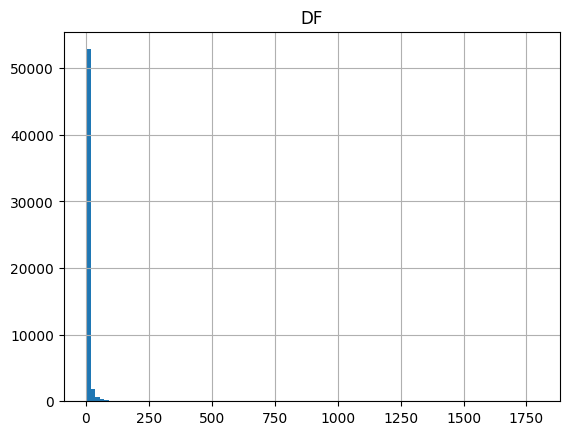

In [133]:
df_document_frequency.hist(bins=100)

In [120]:
import pandas as pd

upper_limit = 9
topics_per_module = topics.groupby(["NAME", "TOPIC"]).size().reset_index(
        name="count")
topics_per_module["count"] = topics_per_module["count"].clip(upper=upper_limit)
topics_per_module

,NAME,TOPIC,count
0,,AS1 (networking),1
1,,Blossom,1
2,,British English,1
3,,CONFIG.SYS,1
4,,Compulsory voting,1
...,...,...,...
345603,Übungen zur deskriptiven Statistik und Wahrscheinlichkeitstheorie,Numerical analysis,1
345604,Übungen zur deskriptiven Statistik und Wahrscheinlichkeitstheorie,Probability theory,1
345605,Übungen zur deskriptiven Statistik und Wahrscheinlichkeitstheorie,Statistics,1
345606,Übungen zur deskriptiven Statistik und Wahrscheinlichkeitstheorie,Stochastic,1


In [109]:


# Group by 'count' and take one random example from each group
random_example_per_group = topics_per_module.groupby('count').apply(
    lambda x: x.sample(1)).reset_index(drop=True)

# Calculate the size of each group
group_sizes = topics_per_module.groupby('count').size().reset_index(name='group_size')

# Merge the random example with the group sizes
result = pd.merge(random_example_per_group, group_sizes, on='count')

result

/var/folders/6p/_m5tm17x05qfp8tftlrxjzd00000gn/T/ipykernel_56610/1843492948.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  random_example_per_group = topics_per_module.groupby('count').apply(


,NAME,TOPIC,count,group_size
0,Practical module: Theoretical Ecology Module title,Space habitat (facility),1,257714
1,Elektrische Energietechnik und Verteilung,Direct current,2,53949
2,Mastermodul Vorund Frühgeschichtliche Archäologie I,Historical archaeology,3,16166
3,Technische Mechanik I,Voltage,4,7330
4,Teilchenphysik an Collidern und im Hochenergie-Universum,Particle physics in cosmology,5,3805
5,Konstruktion 1,Construction,6,2209
6,Einführung in die Optimierung,Mathematical optimization,7,1340
7,"Werkstoffe für Motoren und Antriebssysteme: Luftstrahlantriebe, extreme Anforderungen an besondere Materialien",Materials science,8,856
8,Introduction to the Irish Legal System Introduction to the Irish Legal System,Law of the Republic of Ireland,9,2239


TypeError: 'str' object is not callable

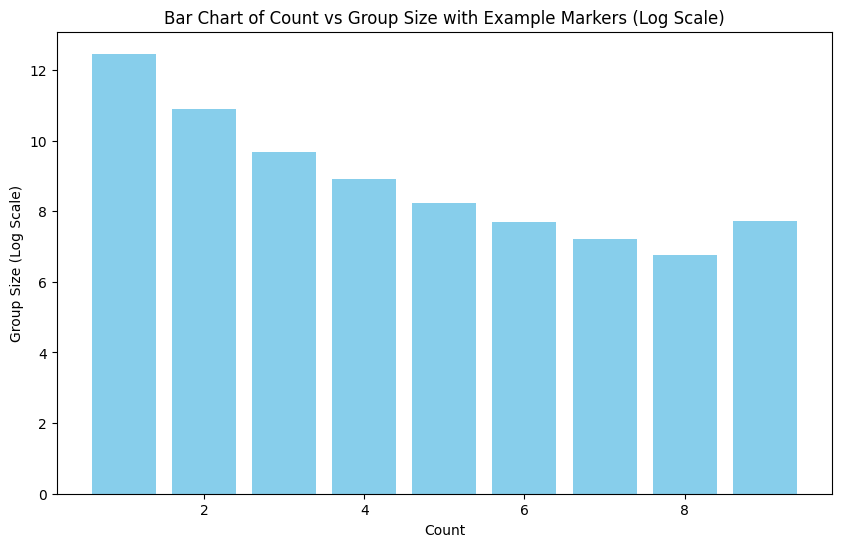

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

# Plotting with y-axis in log scale
plt.figure(figsize=(10, 6))
plt.bar(result['count'], result['log_group_size'], color='skyblue')

# Setting the y-axis to a logarithmic scale

plt.xlabel('Count')
plt.ylabel('Group Size (Log Scale)')
plt.title('Bar Chart of Count vs Group Size with Example Markers (Log Scale)')

plt.yscale("log")
plt.show()

In [ ]:
pd.merge(examples_per_bin, bin_size)

In [70]:
keywords_top5 = DataPrep.cleanTopics(topics, 0).sort_values(by="count", ascending=False)["TOPIC"][:5]

TOPIC
Relative Record Data Set    6363
Scientific literature       2963
R&R                         1714
Scientific method           1587
Presentation                1475
Research                    1396
Thesis                      1320
Literature                  1082
Linguistics                 1044
Methodology                 1017
Name: count, dtype: int64

In [163]:
keywords = list(DataPrep.cleanTopics(topics, 0).sort_values(by="count", ascending=False)["TOPIC"])

In [199]:

import scipy.spatial.distance as dist
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

keywords_top = keywords[:15]
#keywords_top = ["apple", "banana", "cherry", "music", "guitar", "happy", "medicine", "mathematics", "physics", "chemistry"]
keyword_embeddings_top = DataPrep.embed_keywords(keywords_top)

# Calculate the distance matrix using cosine distance
distance_matrix = dist.cdist(keyword_embeddings_top, keyword_embeddings_top, 'cosine')


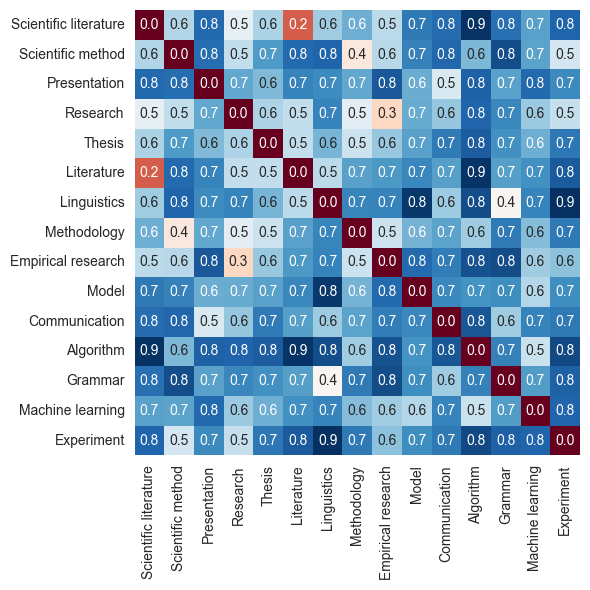

In [200]:

distance_df = pd.DataFrame(distance_matrix, index=keywords_top, columns=keywords_top)

# Plot the distance matrix
plt.figure(figsize=(6, 6))
ax = sns.heatmap(distance_df, annot=True, fmt=".1f", cmap="RdBu", cbar=False)
plt.tight_layout()

# Show the plot
plt.show()

In [4]:

NewsGroupMethodsComp

,method,variant,adj_rand,sil_score
0,ward,embedding,2.416929e-01,0.010302
1,complete,embedding,2.820368e-02,0.009201
2,average,embedding,-1.272255e-05,0.217724
3,single,embedding,-5.249803e-06,0.216047
4,ward,embedding_reduced,2.133259e-01,0.025502
5,complete,embedding_reduced,9.005141e-02,0.006008
6,average,embedding_reduced,2.077907e-05,0.158563
7,single,embedding_reduced,-4.230908e-06,0.186612
8,ward,tfidf_reduced,5.957366e-02,0.068303
9,complete,tfidf_reduced,1.719496e-02,0.049257


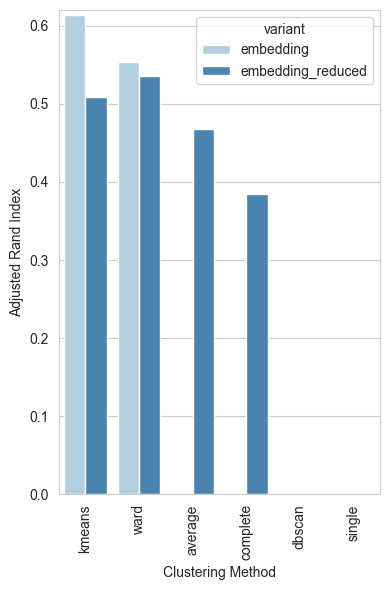

NewsGroupMethodsComp


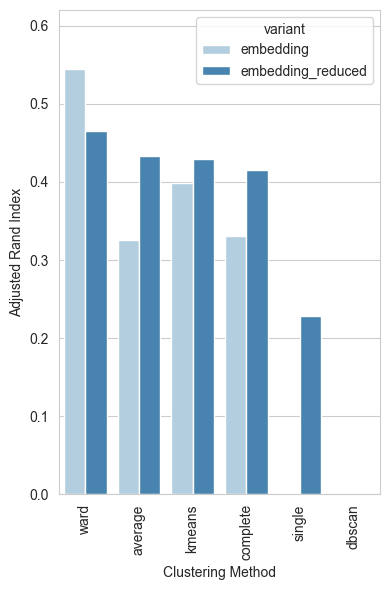

wikiCat10Comp


In [4]:
import pandas as pd
import DataPrep
import scipy.cluster.hierarchy as sch

topics, topics_appearances = DataPrep.prep_keywords(min_appearances=0)
linkage = pd.read_csv("Database/Output/linkage.csv", header=None).values
embeddings = pd.read_csv("Database/Output/embeddings.csv", header=None).values

OperationalError: unable to open database file

In [3]:
silScores = DataPrep.plot_silhouette_scores(linkage, embeddings, [4, 5, 6, 7, 8, 9, 10, 11, 12], "maxclust")

NameError: name 'linkage' is not defined

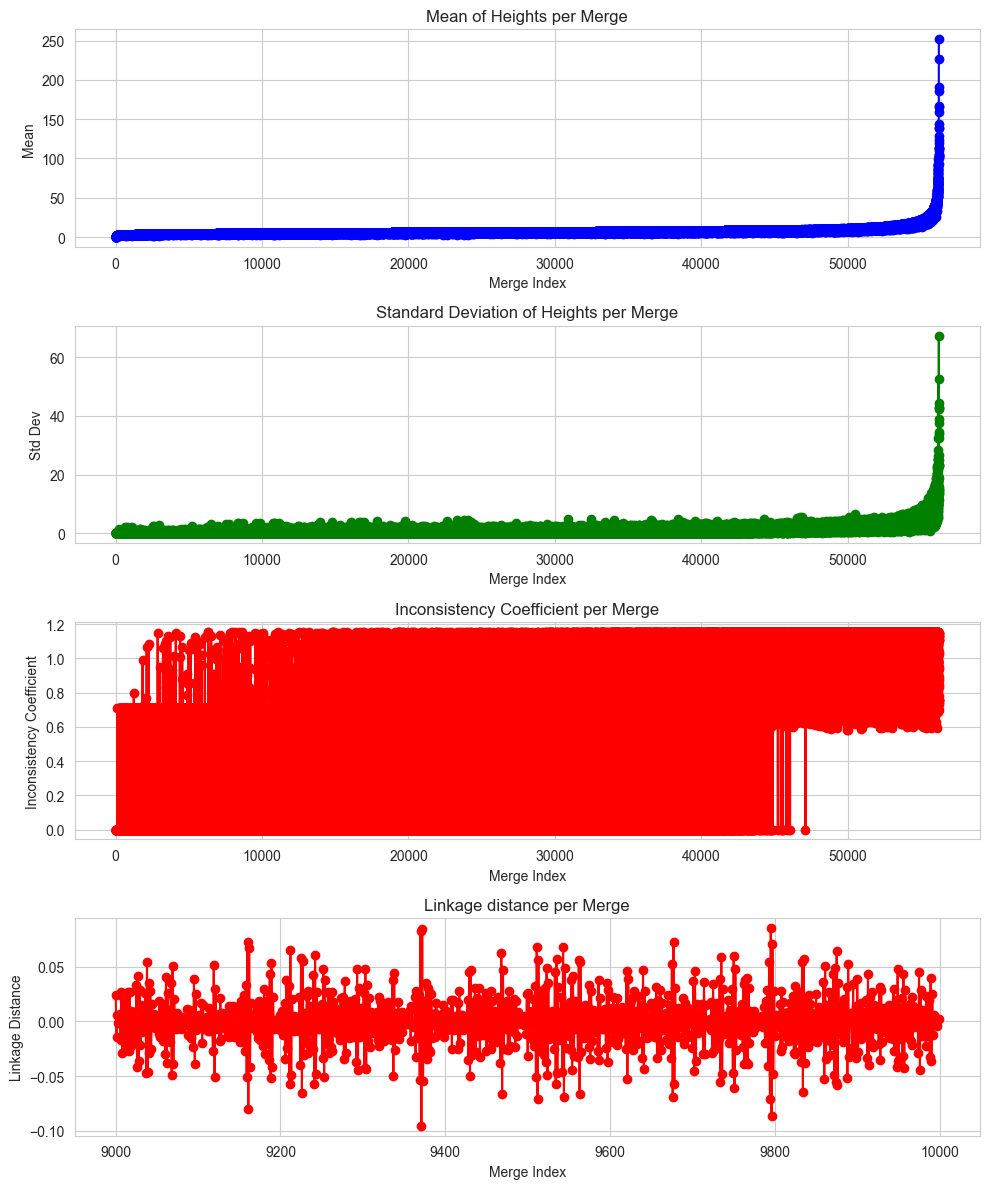

In [28]:
import numpy as np

fig, ax = plt.subplots(4, 1, figsize=(10, 12))

# Plot Mean
ax[0].plot(df_inconsistency.index, df_inconsistency['Mean'], marker='o', color='blue')
ax[0].set_title('Mean of Heights per Merge')
ax[0].set_xlabel('Merge Index')
ax[0].set_ylabel('Mean')
ax[0].grid(True)

# Plot Standard Deviation
ax[1].plot(df_inconsistency.index, df_inconsistency['Std Dev'], marker='o', color='green')
ax[1].set_title('Standard Deviation of Heights per Merge')
ax[1].set_xlabel('Merge Index')
ax[1].set_ylabel('Std Dev')
ax[1].grid(True)

# Plot Inconsistency Coefficient
ax[2].plot(df_inconsistency.index, df_inconsistency['Inconsistency Coefficient'], marker='o', color='red')
ax[2].set_title('Inconsistency Coefficient per Merge')
ax[2].set_xlabel('Merge Index')
ax[2].set_ylabel('Inconsistency Coefficient')
ax[2].grid(True)

ax[3].plot(df_inconsistency.index[9000:10000], np.diff(linkage["2"][9000:10010], n=10), marker='o', color='red')
ax[3].set_title('Linkage distance per Merge')
ax[3].set_xlabel('Merge Index')
ax[3].set_ylabel('Linkage Distance')
ax[3].grid(True)

plt.tight_layout()
plt.show()


In [1]:
from DataPrep import prep_keywords, embed_keywords
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram

keywords, keyword_appearances = prep_keywords(min_appearances=500)
keyword_embeddings = embed_keywords(keywords)
Z = linkage(keyword_embeddings, method='ward')

/Users/bene/PycharmProjects/Topic Clustering/.venv/lib/python3.9/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


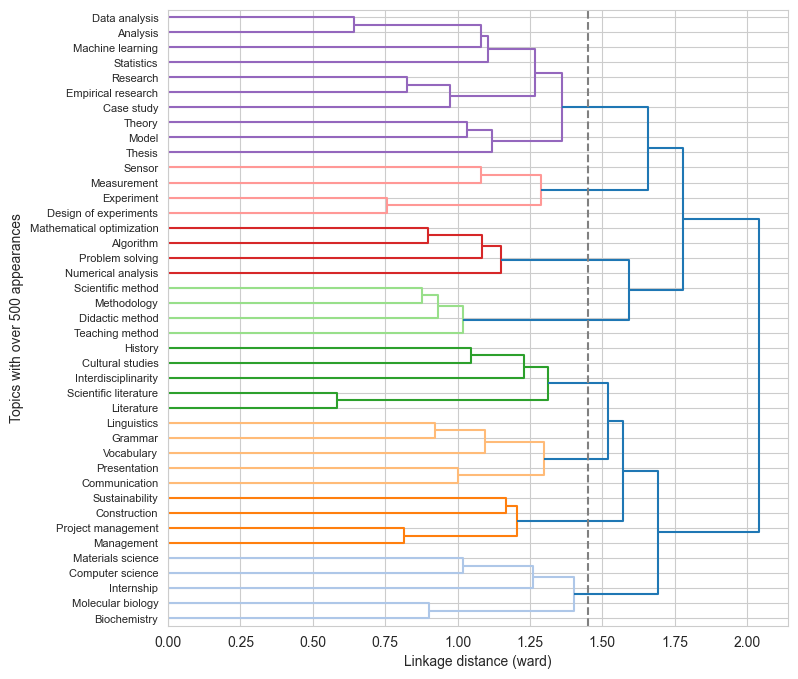

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("tab20")
plt.figure(figsize=(8, 8))
dendrogram(Z, orientation='right', labels=list(keywords), color_threshold=1.5)
plt.xlabel("Linkage distance (ward)")
plt.ylabel("Topics with over 500 appearances")
plt.axvline(x=1.45, color='gray', linestyle='--', label='Threshold at 1.45')

# Display the plot
plt.show()